# Cell group/type specific and interacting cis-eQTL

## 1: Exploratory and prepare BED files

In [1]:
library(data.table)
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
setwd("~/project-gandalm/isoform_twas/eqtl_new/")

In [3]:
load("data/deconv/bmind_deconv_tmmcpm.RData")

In [4]:
ls()

[1] "deconvexp" "frac"      "meta"

In [5]:
length(deconvexp)
dim(frac)
dim(meta)

[1] 90616374

[1] 642   9

[1] 642   9

In [6]:
head(frac)

,End,Ex,In,IP,Mic,OPC,Per,Pg,RG
1474,0.007769616,0.6876736,0.09431819,0.06798413,0.0000000000,0.010432125,0.002019240,0.06350467,0.06629843
1496,0.009077879,0.6950991,0.10125311,0.05952938,0.0021228545,0.013308218,0.002546137,0.05449788,0.06256546
1500,0.007718164,0.6893689,0.09769822,0.06675215,0.0005010374,0.011844901,0.002159362,0.06084511,0.06311216
1502,0.007801555,0.6962789,0.09777313,0.06240760,0.0017860392,0.014279430,0.002430780,0.05673580,0.06050679
1507,0.011033316,0.6992567,0.08793015,0.06379267,0.0024203646,0.014732487,0.002166183,0.05740874,0.06125936
1511,0.008174993,0.6922623,0.08627198,0.07081190,0.0000000000,0.007766166,0.001937926,0.06611211,0.06666260


In [7]:
head(meta)

,X,id,Subject,Age,Sex,inferSex,PCW,subject,study
,<int>,<fct>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<fct>
1,1,X1474,1474,-0.4986301,M,M,14,1474,walker
2,2,X1496,1496,-0.4602740,F,F,16,1496,walker
3,3,X1500,1500,-0.4794521,M,M,15,1500,walker
4,4,X1502,1502,-0.4410959,M,M,17,1502,walker
5,5,X1507,1507,-0.4602740,M,M,16,1507,walker
6,6,X1511,1511,-0.4986301,NA,M,14,1511,walker


In [8]:
dim(deconvexp)

[1] 15683     9   642

In [4]:
head(deconvexp[,2,])

,1474,1496,1500,1502,1507,1511,1513,1525,1531,1533,...,1558,1607,1707.1,1835,1851,1890,1923,2193,849,898
DPM1,4.005725,3.095369,3.443681,2.737351,2.661590,4.062851,3.533806,3.541188,3.123960,3.039353,...,3.609235,3.779717,3.041926,4.522200,3.867199,2.969987,3.606359,2.781253,2.555055,2.639348
SCYL3,3.998866,3.968328,4.075757,3.994266,3.966914,4.124643,3.965934,4.198615,3.230899,3.818343,...,4.190859,3.759647,3.523651,4.500960,3.579177,3.655066,4.175609,3.703842,3.842119,3.623616
C1orf112,4.840503,2.918892,4.091383,2.816584,3.197035,4.272242,3.423219,2.844082,2.373282,3.144096,...,3.113253,3.408291,2.414411,3.755667,2.829963,3.173720,3.061943,2.629331,2.655719,2.333682
CFH,2.195436,2.350440,2.295914,1.854432,2.558543,2.121883,2.647038,2.302723,1.902390,2.513633,...,2.133508,3.142787,2.832339,2.175165,2.841979,2.971774,2.729844,2.828101,2.437076,2.947883
FUCA2,2.590122,2.912466,2.880854,1.935489,2.720960,2.810452,2.281377,2.724907,2.182369,2.574404,...,2.640132,3.204572,2.928693,3.043563,3.045368,2.731748,2.840083,2.790143,2.650652,3.280909
GCLC,4.588254,4.390453,4.556506,4.837204,4.487021,5.082424,4.262425,4.447553,4.517723,5.291882,...,4.146869,4.104386,4.273252,4.676102,4.178827,4.434188,4.561891,4.742233,4.551532,4.244513


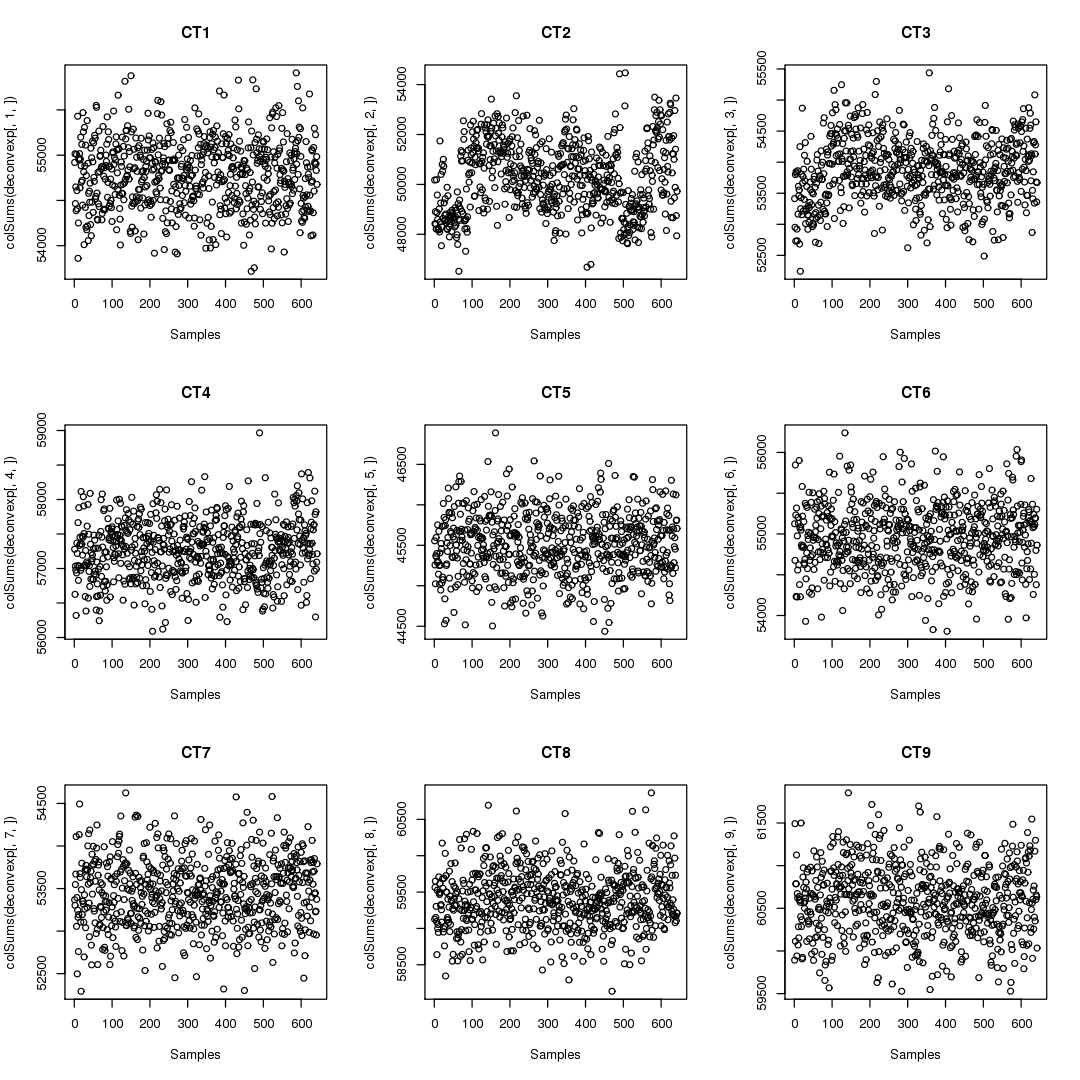

In [29]:
# bmind deconvoluted data, marker gene quantified, TMM CPM normalized, log transformed, ComBat
options(repr.plot.width=9, repr.plot.height=9)
par(mfrow=c(3,3))
plot(colSums(deconvexp[,1,]), main = "CT1", xlab= "Samples")
plot(colSums(deconvexp[,2,]), main = "CT2", xlab= "Samples")
plot(colSums(deconvexp[,3,]), main = "CT3", xlab= "Samples")
plot(colSums(deconvexp[,4,]), main = "CT4", xlab= "Samples")
plot(colSums(deconvexp[,5,]), main = "CT5", xlab= "Samples")
plot(colSums(deconvexp[,6,]), main = "CT6", xlab= "Samples")
plot(colSums(deconvexp[,7,]), main = "CT7", xlab= "Samples")
plot(colSums(deconvexp[,8,]), main = "CT8", xlab= "Samples")
plot(colSums(deconvexp[,9,]), main = "CT9", xlab= "Samples")

In [18]:
walker <- read.table("../genotype/all_data/isec_R2_greater_than_3/ancestry/geno_subj/geno_subj_walker.txt")
obrien <- read.table("../genotype/all_data/isec_R2_greater_than_3/ancestry/geno_subj/geno_subj_obrien.txt")
werling <- read.table("../genotype/all_data/isec_R2_greater_than_3/ancestry/geno_subj/geno_subj_werling.txt")
hdbr <- read.table("../genotype/all_data/isec_R2_greater_than_3/ancestry/geno_subj/geno_subj_hdbr.txt")
libd <- read.table("../genotype/all_data/isec_R2_greater_than_3/ancestry/geno_subj/geno_subj_libd.txt")

In [19]:
groups <- c()

for (i in 1:ncol(deconvexp[,1,])) {
  sample <- colnames(deconvexp[,1,])[i]
  if (sample %in% walker[,1]) {
    groups[i] <- "Walker"
  }
  if (sample %in% obrien[,1]) {
    groups[i] <- "Obrien"
  }
  if (sample %in% werling[,1]) {
    groups[i] <- "Werling"
  }
  if (sample %in% hdbr[,1]) {
    groups[i] <- "HDBR"
  }
  if (sample %in% libd[,1]) {
    groups[i] <- "LIBD"
  }
}

groups <- factor(groups)

In [22]:
s1 <- svd(deconvexp[,1,]- rowMeans(deconvexp[,1,]))
PC1_1 <- s1$d[1]*s1$v[,1]
PC2_1 <- s1$d[2]*s1$v[,2]
data_1 <- data.frame(PC1_1, PC2_1, "Data" = groups)
s2 <- svd(deconvexp[,2,]- rowMeans(deconvexp[,2,]))
PC1_2 <- s2$d[1]*s2$v[,1]
PC2_2 <- s2$d[2]*s2$v[,2]
data_2 <- data.frame(PC1_2, PC2_2, "Data" = groups)
s3 <- svd(deconvexp[,3,]- rowMeans(deconvexp[,3,]))
PC1_3 <- s3$d[1]*s3$v[,1]
PC2_3 <- s3$d[2]*s3$v[,2]
data_3 <- data.frame(PC1_3, PC2_3, "Data" = groups)

In [23]:
s4 <- svd(deconvexp[,4,]- rowMeans(deconvexp[,4,]))
PC1_4 <- s4$d[1]*s4$v[,1]
PC2_4 <- s4$d[2]*s4$v[,2]
data_4 <- data.frame(PC1_4, PC2_4, "Data" = groups)
s5 <- svd(deconvexp[,5,]- rowMeans(deconvexp[,5,]))
PC1_5 <- s5$d[1]*s5$v[,1]
PC2_5 <- s5$d[2]*s5$v[,2]
data_5 <- data.frame(PC1_5, PC2_5, "Data" = groups)
s6 <- svd(deconvexp[,6,]- rowMeans(deconvexp[,6,]))
PC1_6 <- s6$d[1]*s6$v[,1]
PC2_6 <- s6$d[2]*s6$v[,2]
data_6 <- data.frame(PC1_6, PC2_6, "Data" = groups)

In [24]:
s7 <- svd(deconvexp[,7,]- rowMeans(deconvexp[,7,]))
PC1_7 <- s7$d[1]*s7$v[,1]
PC2_7 <- s7$d[2]*s7$v[,2]
data_7 <- data.frame(PC1_7, PC2_7, "Data" = groups)
s8 <- svd(deconvexp[,8,]- rowMeans(deconvexp[,8,]))
PC1_8 <- s8$d[1]*s8$v[,1]
PC2_8 <- s8$d[2]*s8$v[,2]
data_8 <- data.frame(PC1_8, PC2_8, "Data" = groups)
s9 <- svd(deconvexp[,9,]- rowMeans(deconvexp[,9,]))
PC1_9 <- s9$d[1]*s9$v[,1]
PC2_9 <- s9$d[2]*s9$v[,2]
data_9 <- data.frame(PC1_9, PC2_9, "Data" = groups)

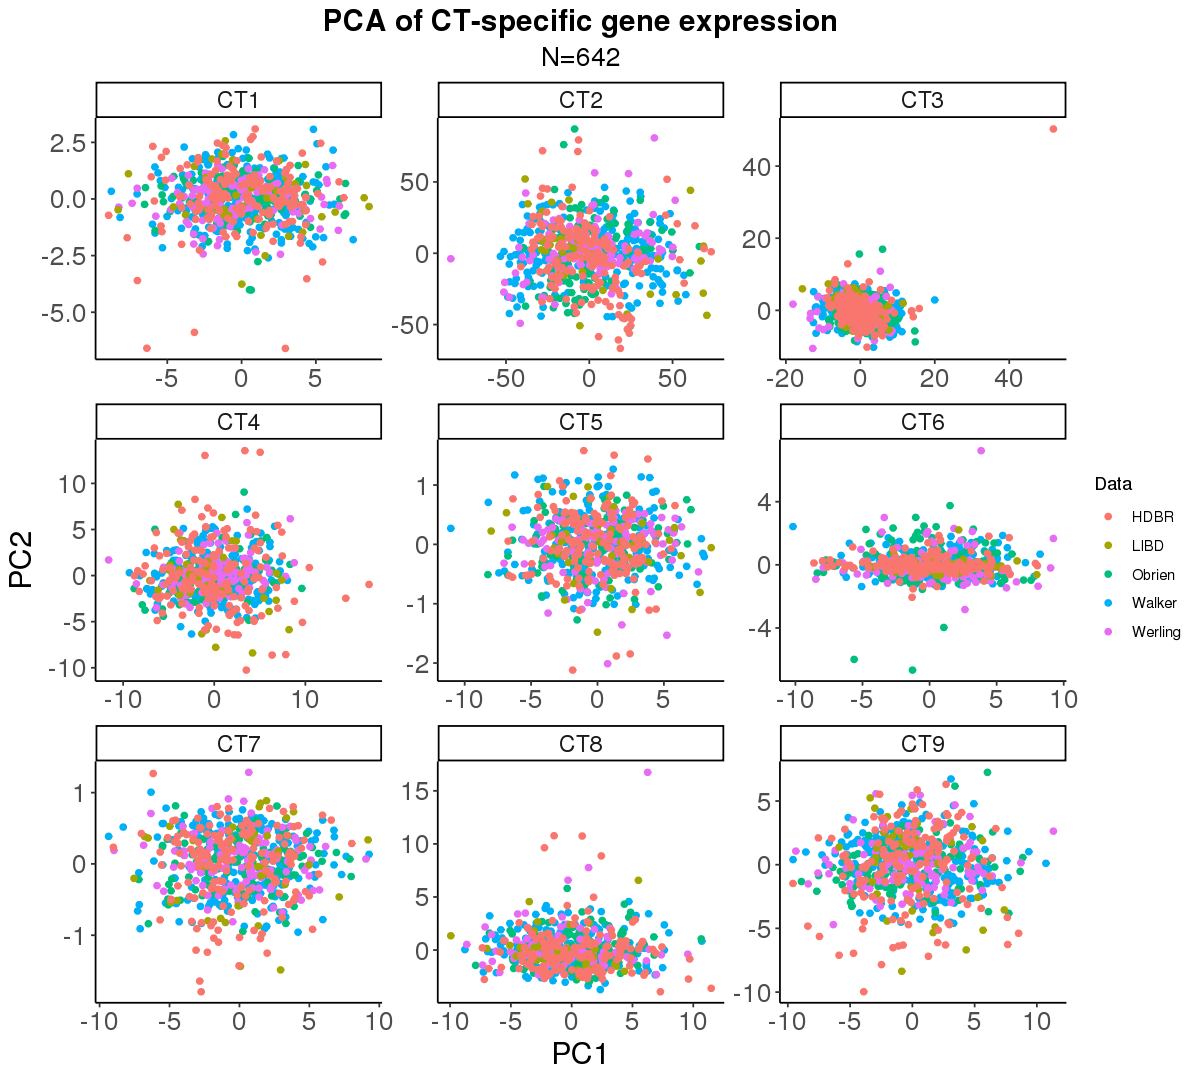

In [28]:
options(repr.plot.width=10, repr.plot.height=9)

colnames(data_1) <- colnames(data_2) <- colnames(data_3) <- colnames(data_4) <- colnames(data_5) <- colnames(data_6) <- colnames(data_7) <- colnames(data_8) <- colnames(data_9) <- c("PC1", "PC2", "Data")
data_all <- rbind(data_1, data_2, data_3, data_4, data_5, data_6, data_7, data_8, data_9)

data_all$group <- c(rep("CT1", 642), 
                    rep("CT2", 642),
                    rep("CT3", 642),
                    rep("CT4", 642),
                    rep("CT5", 642),
                    rep("CT6", 642),
                    rep("CT7", 642),
                    rep("CT8", 642),
                    rep("CT9", 642))
p <- ggplot(data_all, aes(x = PC1, y = PC2, color = Data)) +
  geom_point() +
  facet_wrap(~group, scales = "free", ncol = 3) +
  labs(x = "PC1", y = "PC2", 
       title = "PCA of CT-specific gene expression",
       subtitle = "N=642") +
  theme_classic() +
  theme(axis.text = element_text(size=16),
        axis.title = element_text(size=18),
        plot.title = element_text(size=18, face="bold", hjust = 0.5),
        plot.subtitle = element_text(size=16, hjust = 0.5),
        strip.text.x = element_text(size=14))
p

**Generate BED files**

The 15k genes are intersection of bulk data and marker genes (Rujia), matched to gene names using gencode v19. Some gene names are not in gencode v33. To get coordinates, match gene names to ENSG

In [5]:
gencode <- fread("../salmon/gencode.v33lift37.annotation.gene.info.tsv", data.table = F)
match <- read.table("data/deconv/genes_bmind.csv", stringsAsFactors = F, sep = ",", header = T)

In [15]:
head(match)

,X,symbol,id,type
,<int>,<chr>,<chr>,<chr>
1,1,DPM1,ENSG00000000419,protein_coding
2,2,SCYL3,ENSG00000000457,protein_coding
3,3,C1orf112,ENSG00000000460,protein_coding
4,4,CFH,ENSG00000000971,protein_coding
5,5,FUCA2,ENSG00000001036,protein_coding
6,6,GCLC,ENSG00000001084,protein_coding


In [16]:
sum(rownames(deconvexp[,1,]) %in% gencode$V12)
sum(rownames(deconvexp[,1,]) %in% match$symbol)

[1] 15194

[1] 15683

In [6]:
genes <- data.frame("name" = rownames(deconvexp[,1,]))
head(genes)

,name
,<chr>
1,DPM1
2,SCYL3
3,C1orf112
4,CFH
5,FUCA2
6,GCLC


In [22]:
length(unique(genes$name))

[1] 15683

In [7]:
genes <- genes %>% left_join(match, by = c("name" = "symbol"))
head(genes)

,name,X,id,type
,<chr>,<int>,<chr>,<chr>
1,DPM1,1,ENSG00000000419,protein_coding
2,SCYL3,2,ENSG00000000457,protein_coding
3,C1orf112,3,ENSG00000000460,protein_coding
4,CFH,4,ENSG00000000971,protein_coding
5,FUCA2,5,ENSG00000001036,protein_coding
6,GCLC,6,ENSG00000001084,protein_coding


In [8]:
genes <- genes %>% left_join(gencode, by = c("id" = "ensg"))

In [9]:
# ENSG mapped to different gene names between gencode v19 and v33
sum(genes$name == genes$V12)

[1] 15155

In [12]:
head(genes[genes$name != genes$V12,])

,name,X,id,type,V1,V2,V3,V4,V5,V6,V7,V8,V9,version,V11,V12
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
84,C19orf60,84,ENSG00000006015,protein_coding,chr19,HAVANA,gene,18699495,18703146,.,+,.,"gene_id ""ENSG00000006015.17_5""; gene_type ""protein_coding""; gene_name ""REX1BD""; level 1; hgnc_id ""HGNC:26098""; havana_gene ""OTTHUMG00000183112.1_5""; remap_status ""full_contig""; remap_num_mappings 1; remap_target_status ""overlap"";",17_5,protein_coding,REX1BD
127,GAS7,127,ENSG00000007237,protein_coding,chr17,HAVANA,gene,9813926,10101868,.,-,.,"gene_id ""ENSG00000007237.18_7""; gene_type ""protein_coding""; gene_name ""AC005747.1""; level 2; havana_gene ""OTTHUMG00000177945.15_7""; remap_status ""full_contig""; remap_num_mappings 1; remap_target_status ""overlap"";",18_7,protein_coding,AC005747.1
181,METTL13,181,ENSG00000010165,protein_coding,chr1,HAVANA,gene,171750800,171783163,.,+,.,"gene_id ""ENSG00000010165.20_4""; gene_type ""protein_coding""; gene_name ""EEF1AKNMT""; level 2; hgnc_id ""HGNC:24248""; tag ""overlapping_locus""; havana_gene ""OTTHUMG00000034912.7_4""; remap_status ""full_contig""; remap_num_mappings 1; remap_target_status ""overlap"";",20_4,protein_coding,EEF1AKNMT
201,TCEB3,201,ENSG00000011007,protein_coding,chr1,HAVANA,gene,24069645,24088549,.,+,.,"gene_id ""ENSG00000011007.12_3""; gene_type ""protein_coding""; gene_name ""ELOA""; level 2; hgnc_id ""HGNC:11620""; havana_gene ""OTTHUMG00000002957.3_3""; remap_status ""full_contig""; remap_num_mappings 1; remap_target_status ""overlap"";",12_3,protein_coding,ELOA
205,NME1-NME2,205,ENSG00000243678,protein_coding,chr17,HAVANA,gene,49242796,49249108,.,+,.,"gene_id ""ENSG00000243678.11_3""; gene_type ""protein_coding""; gene_name ""NME2""; level 2; hgnc_id ""HGNC:7850""; tag ""overlapping_locus""; havana_gene ""OTTHUMG00000154062.4_3""; remap_status ""full_contig""; remap_num_mappings 1; remap_target_status ""overlap"";",11_3,protein_coding,NME2
305,RTFDC1,305,ENSG00000022277,protein_coding,chr20,HAVANA,gene,55043641,55094505,.,+,.,"gene_id ""ENSG00000022277.12_4""; gene_type ""protein_coding""; gene_name ""RTF2""; level 1; hgnc_id ""HGNC:15890""; tag ""overlapping_locus""; havana_gene ""OTTHUMG00000032801.3_4""; remap_status ""full_contig""; remap_num_mappings 1; remap_target_status ""overlap"";",12_4,protein_coding,RTF2


In [13]:
genes <- genes %>% select(V1, V7, V4, V5, id)

In [14]:
for(i in 1:nrow(genes)) {
    if(genes[i,'V7'] == "+") {
        tss <- genes[i,'V4']
        genes[i,'V4'] <- tss - 1
        genes[i,'V5'] <- tss
    }
    if(genes[i,'V7'] == "-") {
        tss <- genes[i,'V5']
        genes[i,'V4'] <- tss - 1
        genes[i,'V5'] <- tss
    }
}

In [15]:
genes$V1 <- gsub("chr", "", genes$V1)
genes <- genes %>% select(V1, V4, V5, id)
colnames(genes) <- c("#Chr", "start", "end", "ID")

In [16]:
head(genes)

,#Chr,start,end,ID
,<chr>,<dbl>,<dbl>,<chr>
1,20,49575091,49575092,ENSG00000000419
2,1,169863407,169863408,ENSG00000000457
3,1,169631244,169631245,ENSG00000000460
4,1,196621172,196621173,ENSG00000000971
5,6,143832856,143832857,ENSG00000001036
6,6,53481767,53481768,ENSG00000001084


In [17]:
bed1 <- cbind(genes, deconvexp[,1,])

In [41]:
head(bed1)

,#Chr,start,end,ID,1474,1496,1500,1502,1507,1511,⋯,1558,1607,1707.1,1835,1851,1890,1923,2193,849,898
,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
DPM1,20,49575091,49575092,ENSG00000000419,4.8377975,4.8109010,4.7890561,4.7754193,4.752293,4.8460666,⋯,4.8214712,4.8137773,4.8247233,4.8446226,4.8304558,4.822841,4.8103200,4.7885986,4.7907118,4.7662889
SCYL3,1,169863407,169863408,ENSG00000000457,3.2153722,3.2243348,3.1923157,3.2019921,3.183412,3.2261413,⋯,3.2210441,3.1658952,3.2236343,3.2251834,3.1993201,3.237335,3.2096461,3.2014992,3.2190741,3.1793528
C1orf112,1,169631244,169631245,ENSG00000000460,0.4776292,0.3896306,0.4113906,0.3618562,0.366866,0.4543647,⋯,0.3961065,0.3831377,0.3800369,0.4122188,0.3737316,0.408388,0.3817599,0.3658324,0.3751544,0.3362154
CFH,1,196621172,196621173,ENSG00000000971,6.0954328,6.1081822,6.0756852,6.0817069,6.076075,6.1006802,⋯,6.1074941,6.0910640,6.1278254,6.0900865,6.1027710,6.114336,6.0890197,6.1005297,6.1097840,6.0942797
FUCA2,6,143832856,143832857,ENSG00000001036,5.3744137,5.3974914,5.3597501,5.3326983,5.351002,5.3895841,⋯,5.3840984,5.3880134,5.4088376,5.3824969,5.3904690,5.396810,5.3770094,5.3805020,5.3840755,5.3884568
GCLC,6,53481767,53481768,ENSG00000001084,4.9285835,4.9286842,4.9006352,4.9252550,4.894809,4.9573904,⋯,4.9210451,4.8671955,4.9361396,4.9227783,4.9088039,4.937043,4.9154887,4.9303630,4.9345101,4.8931751


In [12]:
bed2 <- cbind(genes, deconvexp[,2,])
bed3 <- cbind(genes, deconvexp[,3,])
bed4 <- cbind(genes, deconvexp[,4,])
bed5 <- cbind(genes, deconvexp[,5,])
bed6 <- cbind(genes, deconvexp[,6,])
bed7 <- cbind(genes, deconvexp[,7,])
bed8 <- cbind(genes, deconvexp[,8,])
bed9 <- cbind(genes, deconvexp[,9,])

In [13]:
bed1 <- bed1[order(bed1$'#Chr', bed1$'start'),]
bed2 <- bed2[order(bed2$'#Chr', bed2$'start'),]
bed3 <- bed3[order(bed3$'#Chr', bed3$'start'),]
bed4 <- bed4[order(bed4$'#Chr', bed4$'start'),]
bed5 <- bed5[order(bed5$'#Chr', bed5$'start'),]
bed6 <- bed6[order(bed6$'#Chr', bed6$'start'),]
bed7 <- bed7[order(bed7$'#Chr', bed7$'start'),]
bed8 <- bed8[order(bed8$'#Chr', bed8$'start'),]
bed9 <- bed9[order(bed9$'#Chr', bed9$'start'),]

In [ ]:
write.table(bed1, "data/deconv/end.bed", col.names = T, row.names = F, sep = "\t", quote = F)
write.table(bed2, "data/deconv/ex.bed", col.names = T, row.names = F, sep = "\t", quote = F)
write.table(bed3, "data/deconv/in.bed", col.names = T, row.names = F, sep = "\t", quote = F)
write.table(bed4, "data/deconv/ip.bed", col.names = T, row.names = F, sep = "\t", quote = F)
write.table(bed5, "data/deconv/mic.bed", col.names = T, row.names = F, sep = "\t", quote = F)
write.table(bed6, "data/deconv/opc.bed", col.names = T, row.names = F, sep = "\t", quote = F)
write.table(bed7, "data/deconv/per.bed", col.names = T, row.names = F, sep = "\t", quote = F)
write.table(bed8, "data/deconv/pg.bed", col.names = T, row.names = F, sep = "\t", quote = F)
write.table(bed9, "data/deconv/rg.bed", col.names = T, row.names = F, sep = "\t", quote = F)

## 2: CT-specific cis-eQTL results

In [22]:
df <- data.frame('HCP' = rep(seq(10, 100, 10),9),
                 'Count' = NA,
                 'Group' = c(rep("end", 10), rep("ex", 10), rep("in", 10), rep("ip", 10),
                            rep("mic", 10), rep("opc", 10), rep("per", 10), rep("pg", 10), rep("rg", 10)))
for (i in c(1:9)) {
    for(j in seq(10, 100, 10)) {
        df[(i-1)*10+(j-10)/10+1, 'Count'] <- read.table(paste0("results/", df[(i-1)*10+(j-10)/10+1, 'Group'],
                                                               "_nominal_",j,"hcp/significant_feature_count.txt"))[,1]
    }
}

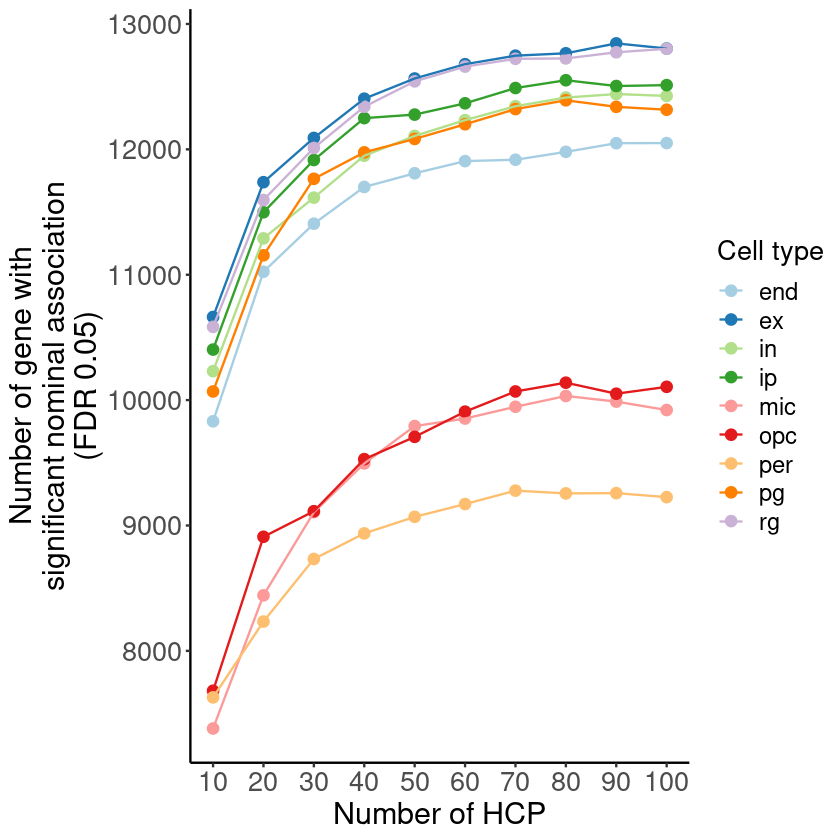

In [25]:
p <- ggplot(df) + 
    geom_point(aes(x = HCP, y = Count, color = Group), size=2.5) +
    geom_line(aes(x = HCP, y = Count, color = Group)) +
    scale_x_continuous(breaks = seq(0, 110, by = 10)) +
    labs(x = "Number of HCP",
         y = "Number of gene with\nsignificant nominal association\n(FDR 0.05)") +
    theme_classic() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14)) +
    scale_colour_brewer(palette = "Paired", name = "Cell type")
p

In [26]:
ggsave("figures/ct_nominal.png", p, width = 6, height = 6)

**CT-specific eGene (permutations)**

In [7]:
ex_egene <- unique(fread("results/ex_perm_90hcp/sig_pheno.txt", data.table = F)$pid)
end_egene <- unique(fread("results/end_perm_100hcp/sig_pheno.txt", data.table = F)$pid)
in_egene <- unique(fread("results/in_perm_90hcp/sig_pheno.txt", data.table = F)$pid)
ip_egene <- unique(fread("results/ip_perm_80hcp/sig_pheno.txt", data.table = F)$pid)
mic_egene <- unique(fread("results/mic_perm_80hcp/sig_pheno.txt", data.table = F)$pid)
per_egene <- unique(fread("results/per_perm_70hcp/sig_pheno.txt", data.table = F)$pid)
opc_egene <- unique(fread("results/opc_perm_80hcp/sig_pheno.txt", data.table = F)$pid)
pg_egene <- unique(fread("results/pg_perm_80hcp/sig_pheno.txt", data.table = F)$pid)
rg_egene <- unique(fread("results/rg_perm_100hcp/sig_pheno.txt", data.table = F)$pid)

In [8]:
bulk <- unique(fread("results/mixed_perm_90hcp/sig_pheno.txt", data.table = F)$pid)

In [12]:
df <- data.frame("type" = c("ex", "end", "in", "ip", "mic", "per", "opc", "pg", "rg"),
                 "egene" = c(length(ex_egene),
                             length(end_egene),
                             length(in_egene),
                             length(ip_egene),
                             length(mic_egene),
                             length(per_egene),
                             length(opc_egene),
                             length(pg_egene),
                             length(rg_egene)),
                 "shared" = c(sum(ex_egene %in% bulk),
                              sum(end_egene %in% bulk),
                              sum(in_egene %in% bulk),
                              sum(ip_egene %in% bulk),
                              sum(mic_egene %in% bulk),
                              sum(per_egene %in% bulk),
                              sum(opc_egene %in% bulk),
                              sum(pg_egene %in% bulk),
                              sum(rg_egene %in% bulk)))

In [13]:
df

type,egene,shared
<chr>,<int>,<int>
ex,7152,5917
end,6213,5207
in,6697,5498
ip,6824,5504
mic,4153,3510
per,3717,3221
opc,4386,3680
pg,6529,5337
rg,7126,5754


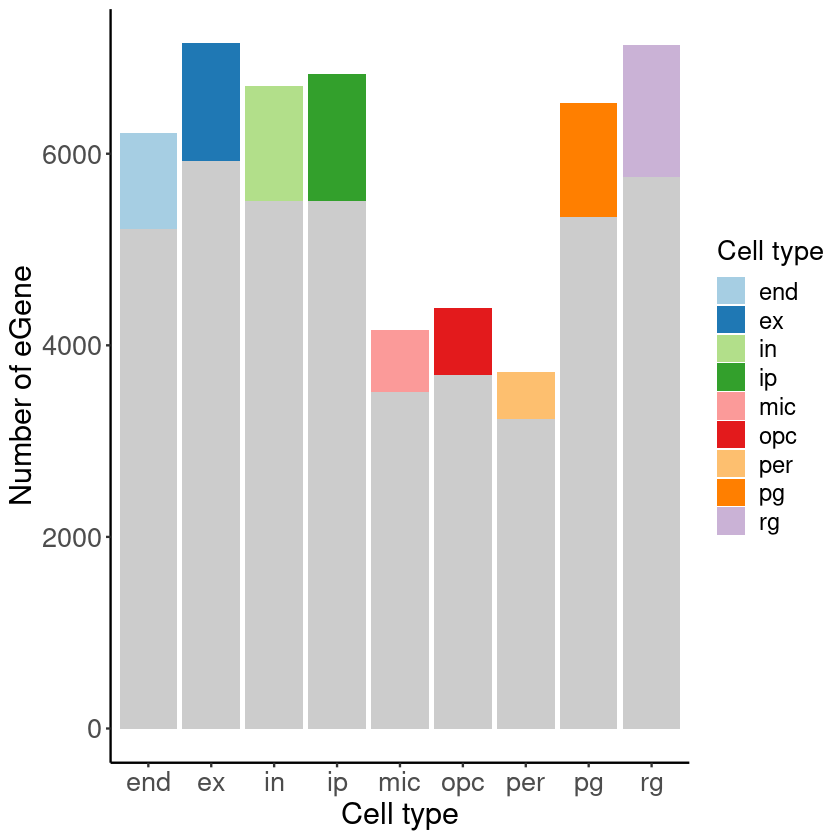

In [19]:
p <- ggplot(df, aes(x = type)) +
    geom_bar(aes(y = egene, fill = type), position = "stack", stat = "identity") +
    geom_bar(aes(y = shared), fill = "grey80", position = "stack", stat = "identity") +
    labs(x = "Cell type", y = "Number of eGene") +
    theme_classic() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14)) +
    scale_fill_brewer(palette = "Paired", name = "Cell type")
p

In [21]:
ggsave("figures/ct_egene.png", p, width = 6, height = 6)

## 3: Decon-QTL (interacting)

**Input 1: `--genotype` see `decon.smk`. Here add header to bim file**
- File was written in `cell_specific_analysis.ipynb`

In [1]:
# bim <- fread("../genotype/all_data/isec_R2_greater_than_3/ancestry/filtered.hg19.sorted.bim", data.table = F)
# names(bim) <- c("CHR", "ID", "dummy", "POS", "MINOR", "MAJOR")
# write.table(bim, "../genotype/all_data/isec_R2_greater_than_3/ancestry/filtered.hg19.sorted.bim.header", col.names = T, row.names = F, quote = F, sep = "\t")

**Input 2: `--expression` see example data in Decon-QTL github repo**
- File was written in `cell_specific_analysis.ipynb`

In [4]:
bulk <- fread("data/gene.counts.scaled.normalized.bed.gz", data.table = F)
bulk.decon <- bulk[,4:646]
rownames(bulk.decon) <- bulk.decon$ID
bulk.decon <- bulk.decon[, -1]
rel <- read.table("../genotype/all_data/isec_R2_greater_than_3/ancestry/related.txt", header = F, stringsAsFactors = F)[,1]
bulk.decon <- bulk.decon[, !colnames(bulk.decon) %in% rel]
dim(bulk.decon) # 31947*629

[1] 31947   629

**Input 3: `--snpsToTest`**
- File was written in `cell_specific_analysis.ipynb`

In [47]:
# this is top variants per rank of all expressed genes
cond <- read.table("results/mixed_conditional_90hcp/conditional_top_variants.txt", hea = F, stringsAsFactors = F)
# filter for variants with backward p-val below threshold of the gene
cond <- cond %>% filter(V20 == 1)
dim(cond)
# filter for primary, secondary, tertiary, qauternary
cond <- cond %>% filter(V12 <= 3)
dim(cond)
cond1 <- cond %>% select(V1, V8)
names(cond1) <- c("gene", "snp")
dim(cond1)

[1] 16554    20

[1] 16325    20

[1] 16325     2

In [27]:
library(plyr)

In [48]:
freq.df <- count(cond1) 

In [49]:
table(freq.df$freq)
freq.df %>% filter(freq == 2) #somehow some genes have the same top variants in different ranks


    1     2 
16319     3 

gene,snp,freq
<chr>,<chr>,<int>
ENSG00000134463,rs11257293,2
ENSG00000198912,rs12753572,2
ENSG00000267198,rs74521229,2


In [50]:
freq.df.unique <- freq.df %>% filter(freq == 1)
dim(freq.df.unique)

[1] 16319     3

In [52]:
cond1.unique <- freq.df.unique %>% select(gene, snp)
# write.table(cond1.unique, "data/deconv/gene_snp_file.txt", col.names = T, row.names = F, quote = F, sep = "\t")

In [53]:
length(unique(cond1.unique$gene))
length(unique(cond1.unique$snp))
dim(cond1.unique)

[1] 10980

[1] 15664

[1] 16319     2

**Input 4: `--cellcount`**

In [8]:
head(frac)

,End,Ex,In,IP,Mic,OPC,Per,Pg,RG
1474,0.007769616,0.6876736,0.09431819,0.06798413,0.0000000000,0.010432125,0.002019240,0.06350467,0.06629843
1496,0.009077879,0.6950991,0.10125311,0.05952938,0.0021228545,0.013308218,0.002546137,0.05449788,0.06256546
1500,0.007718164,0.6893689,0.09769822,0.06675215,0.0005010374,0.011844901,0.002159362,0.06084511,0.06311216
1502,0.007801555,0.6962789,0.09777313,0.06240760,0.0017860392,0.014279430,0.002430780,0.05673580,0.06050679
1507,0.011033316,0.6992567,0.08793015,0.06379267,0.0024203646,0.014732487,0.002166183,0.05740874,0.06125936
1511,0.008174993,0.6922623,0.08627198,0.07081190,0.0000000000,0.007766166,0.001937926,0.06611211,0.06666260


In [6]:
frac <- frac[!rownames(frac) %in% rel, ]
dim(frac)

[1] 629   9

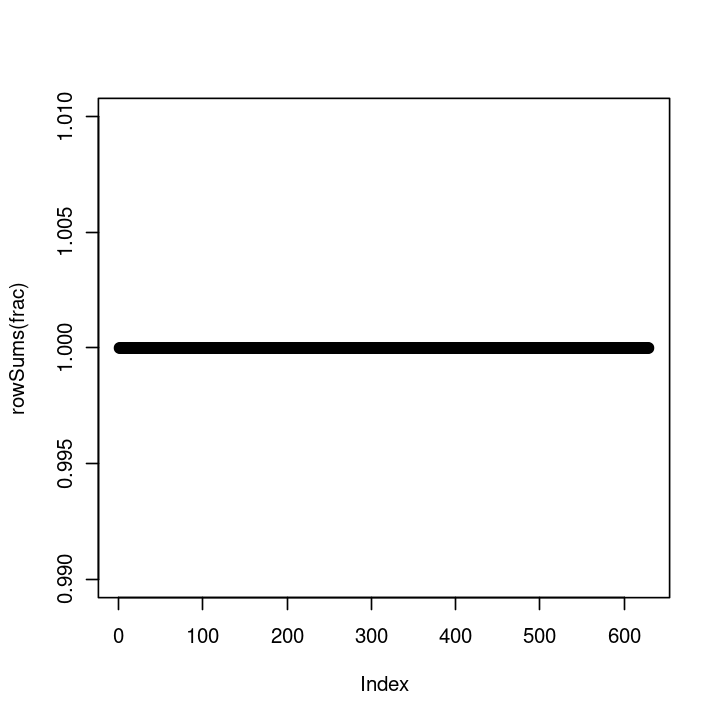

In [12]:
options(repr.plot.width=6, repr.plot.height=6)
plot(rowSums(frac))

In [14]:
# For Decon-eQTL the cellcounts have to be scaled to sum to 100
frac.scaled <- (frac/rowSums(frac))*100
write.table(frac.scaled, "data/deconv/cellcounts.tsv", col.names = T, row.names = T, quote = F, sep = "\t")

In [ ]:
sum(rownames(frac.scaled) == colnames(bulk.decon))

### Decon-QTL results
- tested 16319 gene-eQTL pairs (10980 genes, mostly are permutation eGenes; 15664 eQTL)

In [39]:
out <- fread("results/decon/deconvolutionResults.csv", data.table = F)
dim(out)
head(out)

[1] 16319    28

,V1,End_pvalue,Ex_pvalue,In_pvalue,IP_pvalue,Mic_pvalue,OPC_pvalue,Per_pvalue,Pg_pvalue,RG_pvalue,...,Beta9_RG,Beta10_End:GT,Beta11_Ex:GT,Beta12_In:GT,Beta13_IP:GT,Beta14_Mic:GT,Beta15_OPC:GT,Beta16_Per:GT,Beta17_Pg:GT,Beta18_RG:GT
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSG00000016082_rs16879255,0.7586417,0.9999995,1.00000000,0.6678405,0.7586417,0.7502456,1.0000000,0.999999588,1.0000000,...,0.0000000,0.2239906,0.000000000,0.00000000,-0.07273372,0.87143011,0.08849273,0.0000000,0.000000000,0.00000000
2,ENSG00000179029_rs112502892,0.2837335,0.9166590,0.01114886,1.0000000,1.0000000,0.9166590,0.1079793,0.975242255,1.0000000,...,0.2038218,0.1243775,-0.010382580,0.05741660,0.00000000,0.00000000,0.01173926,0.2234753,0.002260944,0.00000000
3,ENSG00000115839_rs62170242,1.0000000,0.9999988,0.31416502,0.3874868,0.6227662,0.9999995,1.0000000,0.406499258,0.1669385,...,0.1737563,0.0000000,0.000000000,-0.01421360,-0.02163572,-0.07932083,0.00000000,0.0000000,-0.030626108,0.07068684
4,ENSG00000103852_chr15:99233065,0.6271310,0.1460596,0.20070378,0.5359907,0.9999995,0.9999994,1.0000000,0.276347767,1.0000000,...,0.2423588,-0.0463423,0.010646393,-0.02638970,-0.01789520,0.00000000,0.00000000,0.0000000,-0.065989468,0.00000000
5,ENSG00000180011_rs1440298,1.0000000,0.1559216,0.99999929,0.4039234,0.9042055,0.5525287,0.9999994,0.007782566,0.5289657,...,0.0241983,0.0000000,-0.009770744,0.00000000,-0.02979586,-0.04823973,-0.05492116,0.0000000,0.216096182,-0.04565308
6,ENSG00000103855_chr15:73716885,1.0000000,0.9999988,0.58510328,0.9999994,0.6339643,0.9999996,1.0000000,0.352288035,0.4504794,...,0.0000000,0.0000000,0.000000000,-0.01259069,0.00000000,-0.06730373,0.00000000,0.0000000,-0.022082594,0.03972497


- column 2-10: p-values for each of the cell types. To be FDR/BH corrected
- column 11-..: betas for each of the cell types
- column ..-28: betas of the cell type - genotype interaction effect, relative to the allele that is coded as 2 in the dosage file

In [40]:
out$End_pvalue_fdr <- p.adjust(out$End_pvalue, method = 'fdr')
out$Ex_pvalue_fdr <- p.adjust(out$Ex_pvalue, method = 'fdr')
out$In_pvalue_fdr <- p.adjust(out$In_pvalue, method = 'fdr')
out$IP_pvalue_fdr <- p.adjust(out$IP_pvalue, method = 'fdr')
out$Mic_pvalue_fdr <- p.adjust(out$Mic_pvalue, method = 'fdr')
out$OPC_pvalue_fdr <- p.adjust(out$OPC_pvalue, method = 'fdr')
out$Per_pvalue_fdr <- p.adjust(out$Per_pvalue, method = 'fdr')
out$Pg_pvalue_fdr <- p.adjust(out$Pg_pvalue, method = 'fdr')
out$RG_pvalue_fdr <- p.adjust(out$RG_pvalue, method = 'fdr')

In [43]:
sum(out$End_pvalue_fdr < 0.05)
sum(out$Ex_pvalue_fdr < 0.05)
sum(out$In_pvalue_fdr < 0.05)
sum(out$IP_pvalue_fdr < 0.05)
sum(out$Mic_pvalue_fdr < 0.05)
sum(out$OPC_pvalue_fdr < 0.05)
sum(out$Per_pvalue_fdr < 0.05)
sum(out$Pg_pvalue_fdr < 0.05)
sum(out$RG_pvalue_fdr < 0.05)

[1] 0

[1] 4

[1] 15

[1] 0

[1] 1

[1] 0

[1] 0

[1] 0

[1] 0

In [56]:
out %>% filter(Ex_pvalue_fdr < 0.05)
out %>% filter(In_pvalue_fdr < 0.05)
out %>% filter(Mic_pvalue_fdr < 0.05)

V1,End_pvalue,Ex_pvalue,In_pvalue,IP_pvalue,Mic_pvalue,OPC_pvalue,Per_pvalue,Pg_pvalue,RG_pvalue,...,Beta18_RG:GT,End_pvalue_fdr,Ex_pvalue_fdr,In_pvalue_fdr,IP_pvalue_fdr,Mic_pvalue_fdr,OPC_pvalue_fdr,Per_pvalue_fdr,Pg_pvalue_fdr,RG_pvalue_fdr
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000117133_rs11163977,1.0000000,1.007076e-07,1.683869e-02,0.1962753827,1,1.00000000,1.00000000,0.0700194313,0.04628253,...,0.13970046,1,0.0008217239,0.645786508,1.0000000,1,1,1,1,1
ENSG00000215790_chr1:1732412,1.0000000,4.482048e-06,9.813906e-07,0.0001790912,1,1.00000000,1.00000000,1.0000000000,1.00000000,...,0.00000000,1,0.0243808454,0.004602185,0.9296438,1,1,1,1,1
ENSG00000117592_chr1:173511455,1.0000000,1.189560e-05,6.887497e-01,0.2555271328,1,1.00000000,0.99999949,0.0005651041,0.41802080,...,-0.02681012,1,0.0485310837,1.000000000,1.0000000,1,1,1,1,1
ENSG00000135828_rs12041623,0.1528703,4.113938e-08,9.999992e-01,0.9999993964,1,0.07989483,0.01371115,0.0129939623,0.02641555,...,-0.14792018,1,0.0006713535,1.000000000,1.0000000,1,1,1,1,1


V1,End_pvalue,Ex_pvalue,In_pvalue,IP_pvalue,Mic_pvalue,OPC_pvalue,Per_pvalue,Pg_pvalue,RG_pvalue,...,Beta18_RG:GT,End_pvalue_fdr,Ex_pvalue_fdr,In_pvalue_fdr,IP_pvalue_fdr,Mic_pvalue_fdr,OPC_pvalue_fdr,Per_pvalue_fdr,Pg_pvalue_fdr,RG_pvalue_fdr
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000149273_rs3133186,1.00000000,1.111724e-02,8.450873e-06,0.1719859074,1.00000000,0.33815285,1.0000000,1.0000000,1.00000000,...,0.00000000,1,0.79988163,1.992722e-02,1.0000000,1,1,1,1,1
ENSG00000061794_rs10842973,1.00000000,9.999996e-01,1.116264e-05,0.6782470082,1.00000000,1.00000000,1.0000000,0.1632286,1.00000000,...,0.00000000,1,1.00000000,2.277039e-02,1.0000000,1,1,1,1,1
ENSG00000150459_rs9552377,1.00000000,1.222825e-02,8.547737e-06,0.2915021620,1.00000000,0.50372308,0.1123670,0.3832610,1.00000000,...,0.00000000,1,0.81923364,1.992722e-02,1.0000000,1,1,1,1,1
ENSG00000197208_rs2706394,1.00000000,4.813331e-04,8.096097e-06,1.0000000000,0.99999932,0.71207014,0.6268565,1.0000000,1.00000000,...,0.00000000,1,0.29092131,1.992722e-02,1.0000000,1,1,1,1,1
ENSG00000102978_rs1273590,1.00000000,4.679943e-02,4.237507e-05,0.6625948448,1.00000000,1.00000000,1.0000000,1.0000000,1.00000000,...,0.00000000,1,1.00000000,4.610125e-02,1.0000000,1,1,1,1,1
ENSG00000215790_chr1:1732412,1.00000000,4.482048e-06,9.813906e-07,0.0001790912,1.00000000,1.00000000,1.0000000,1.0000000,1.00000000,...,0.00000000,1,0.02438085,4.602185e-03,0.9296438,1,1,1,1,1
ENSG00000167695_rs67193655,1.00000000,5.396223e-01,4.043042e-05,0.9726842341,1.00000000,1.00000000,0.1775225,0.5801018,0.85807350,...,-0.01342507,1,1.00000000,4.610125e-02,1.0000000,1,1,1,1,1
ENSG00000166508_rs193110643,0.99999944,4.675892e-04,2.842688e-05,0.0035589330,0.32121809,1.00000000,1.0000000,0.6588284,1.00000000,...,0.00000000,1,0.29092131,3.568449e-02,1.0000000,1,1,1,1,1
ENSG00000275674_rs12441032,0.13146732,8.814880e-01,1.267027e-05,1.0000000000,0.92939412,0.79005132,0.1406495,0.7366976,0.57937689,...,0.02042301,1,1.00000000,2.277209e-02,1.0000000,1,1,1,1,1


V1,End_pvalue,Ex_pvalue,In_pvalue,IP_pvalue,Mic_pvalue,OPC_pvalue,Per_pvalue,Pg_pvalue,RG_pvalue,...,Beta18_RG:GT,End_pvalue_fdr,Ex_pvalue_fdr,In_pvalue_fdr,IP_pvalue_fdr,Mic_pvalue_fdr,OPC_pvalue_fdr,Per_pvalue_fdr,Pg_pvalue_fdr,RG_pvalue_fdr
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000171368_rs1697975,1,0.3676339,1,1,2.116928e-09,0.04912364,1,1,1,...,0,1,1,1,1,3.454615e-05,1,1,1,1


**TPPP (ENSG00000171368), Mic**

In [105]:
df <- t(bulk.decon["ENSG00000171368",])

In [106]:
df <- as.data.frame(cbind(df, frac)) %>% select(ENSG00000171368, Mic)

In [3]:
dosage <- fread("../genotype/all_data/isec_R2_greater_than_3/ancestry/filtered.hg19.sorted.removeGeneOutlier.dose.decon.snpsToTest.fixed.txt", data.table = F)

Warning message in fread("../genotype/all_data/isec_R2_greater_than_3/ancestry/filtered.hg19.sorted.removeGeneOutlier.dose.decon.snpsToTest.fixed.txt", :
“Detected 629 column names but the data has 630 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”


In [107]:
qtl <- dosage %>% filter(V1 == "rs1697975")

In [108]:
qtl <- qtl %>% select(-1)

In [109]:
df <- cbind(df, as.data.frame(t(qtl)))

In [111]:
colnames(df) <- c("expr", "mic_frac", "geno")
df$geno <- as.factor(df$geno)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



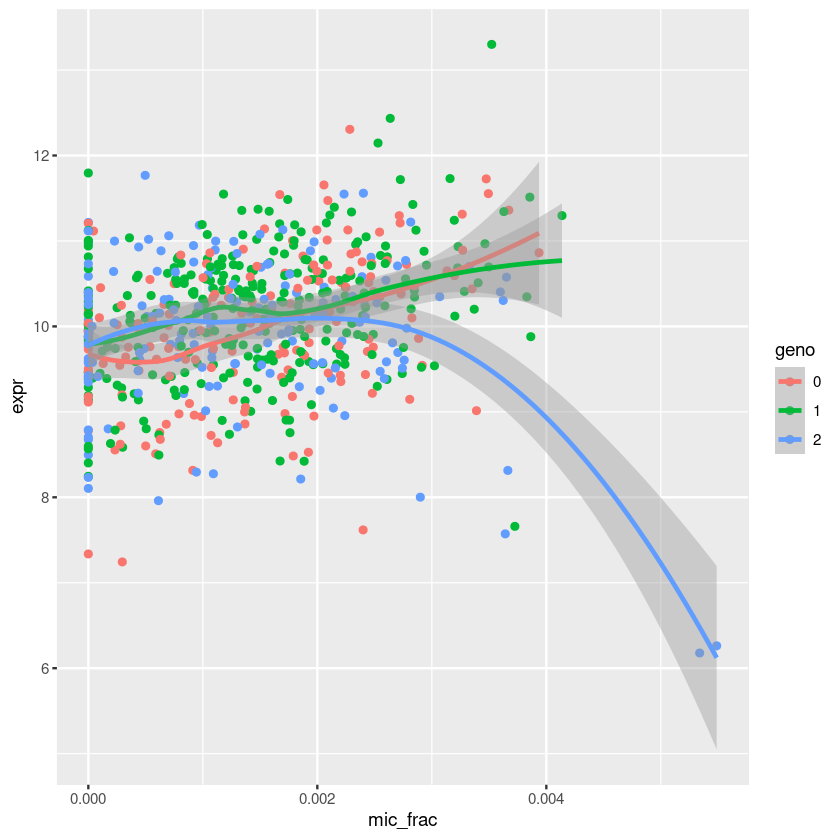

In [112]:
p <- ggplot(df, aes(x = mic_frac, y = expr)) +
    geom_point(aes(color = geno)) +
    geom_smooth(aes(color = geno))
p

**ENSG00000117133_rs11163977, Ex**

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



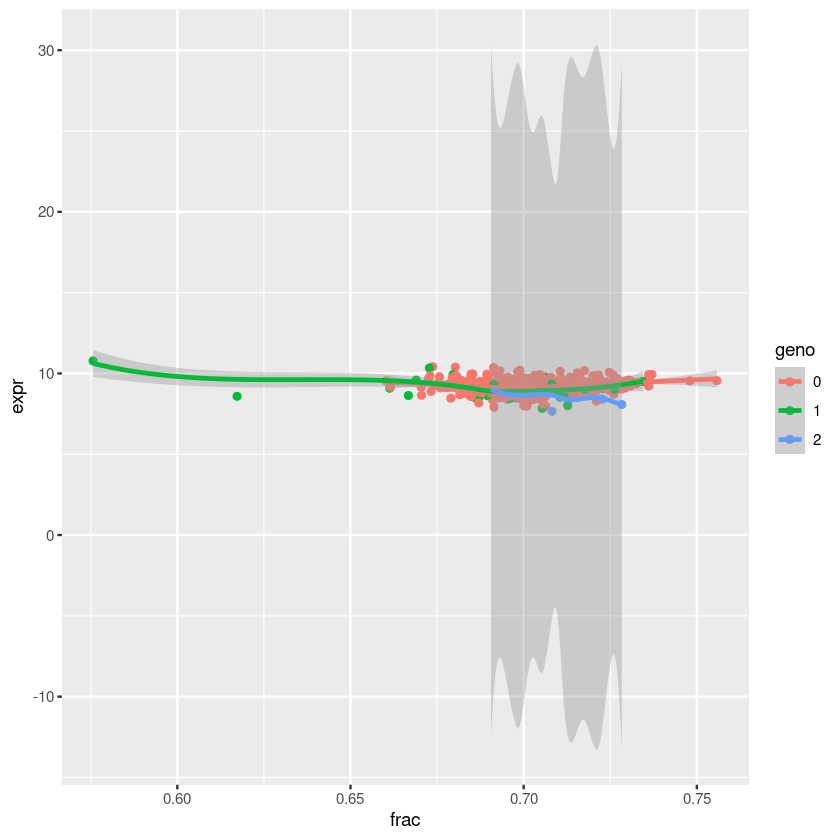

In [101]:
df <- t(bulk.decon["ENSG00000117133",])
df <- as.data.frame(cbind(df, frac)) %>% select(ENSG00000117133, Ex)
qtl <- dosage %>% filter(V1 == "rs11163977")
qtl <- qtl %>% select(-1)
df <- cbind(df, as.data.frame(t(qtl)))
colnames(df) <- c("expr", "frac", "geno")
df$geno <- as.factor(df$geno)

p <- ggplot(df, aes(x = frac, y = expr)) +
    geom_point(aes(color = geno)) +
    geom_smooth(aes(color = geno)) 
p

**ENSG00000215790_chr1:1732412, Ex**

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



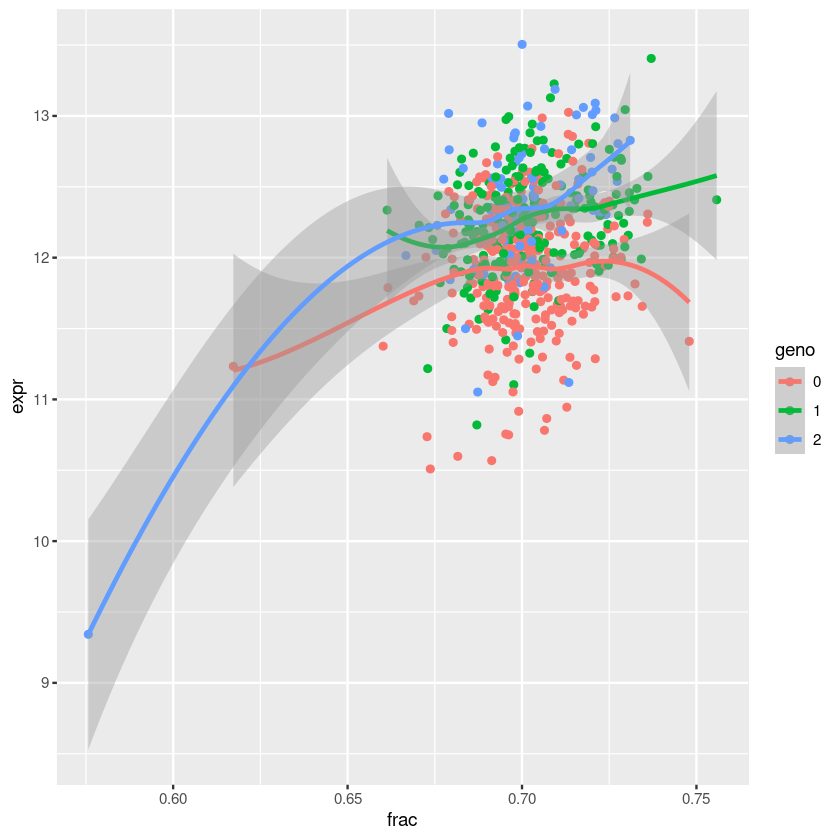

In [103]:
df <- t(bulk.decon["ENSG00000215790",])
df <- as.data.frame(cbind(df, frac)) %>% select(ENSG00000215790, Ex)
qtl <- dosage %>% filter(V1 == "chr1:1732412")
qtl <- qtl %>% select(-1)
df <- cbind(df, as.data.frame(t(qtl)))
colnames(df) <- c("expr", "frac", "geno")
df$geno <- as.factor(df$geno)

p <- ggplot(df, aes(x = frac, y = expr)) +
    geom_point(aes(color = geno)) +
    geom_smooth(aes(color = geno)) 
p

**ENSG00000117592_chr1:173511455, Ex**

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



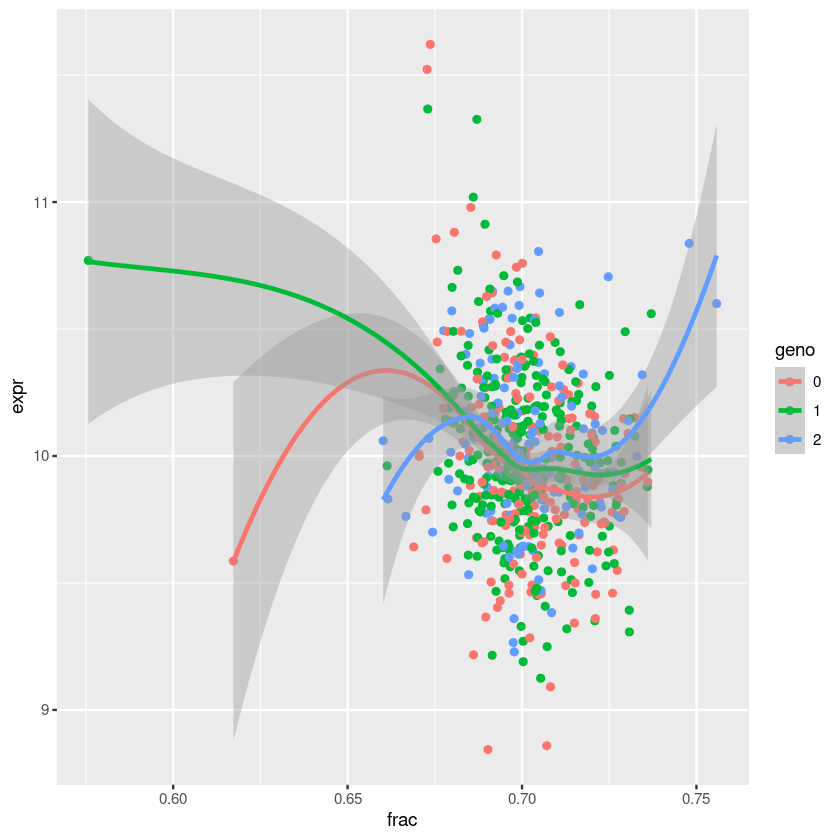

In [104]:
df <- t(bulk.decon["ENSG00000117592",])
df <- as.data.frame(cbind(df, frac)) %>% select(ENSG00000117592, Ex)
qtl <- dosage %>% filter(V1 == "chr1:173511455")
qtl <- qtl %>% select(-1)
df <- cbind(df, as.data.frame(t(qtl)))
colnames(df) <- c("expr", "frac", "geno")
df$geno <- as.factor(df$geno)

p <- ggplot(df, aes(x = frac, y = expr)) +
    geom_point(aes(color = geno)) +
    geom_smooth(aes(color = geno)) 
p

**ENSG00000135828_rs12041623, Ex**

In [93]:
df <- t(bulk.decon["ENSG00000135828",])
df <- as.data.frame(cbind(df, frac)) %>% select(ENSG00000135828, Ex)
qtl <- dosage %>% filter(V1 == "rs12041623")
qtl <- qtl %>% select(-1)
df <- cbind(df, as.data.frame(t(qtl)))
colnames(df) <- c("expr", "frac", "geno")
df$geno <- as.factor(df$geno)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



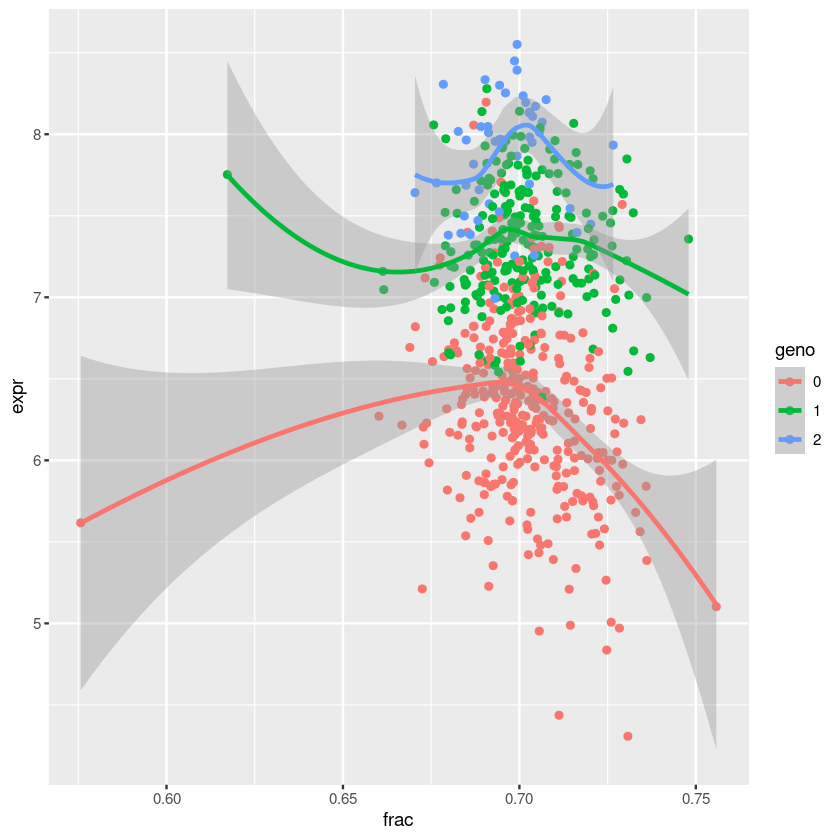

In [98]:
p <- ggplot(df, aes(x = frac, y = expr)) +
    geom_point(aes(color = geno)) +
    geom_smooth(aes(color = geno)) 
#     xlim(0.65, 0.75)
p

**ENSG00000166508_rs193110643, In**

In [9]:
df <- t(bulk.decon["ENSG00000166508",])
df <- as.data.frame(cbind(df, frac)) %>% select(ENSG00000166508, In)
qtl <- dosage %>% filter(V1 == "rs193110643")
qtl <- qtl %>% select(-1)
df <- cbind(df, as.data.frame(t(qtl)))
colnames(df) <- c("expr", "frac", "geno")
df$geno <- as.factor(df$geno)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“Chernobyl! trL>n 6”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“Chernobyl! trL>n 6”
Warning message in sqrt(sum.squares/one.delta):
“NaNs produced”
Warning message in stats::qt(level/2 + 0.5, pred$df):
“NaNs produced”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”


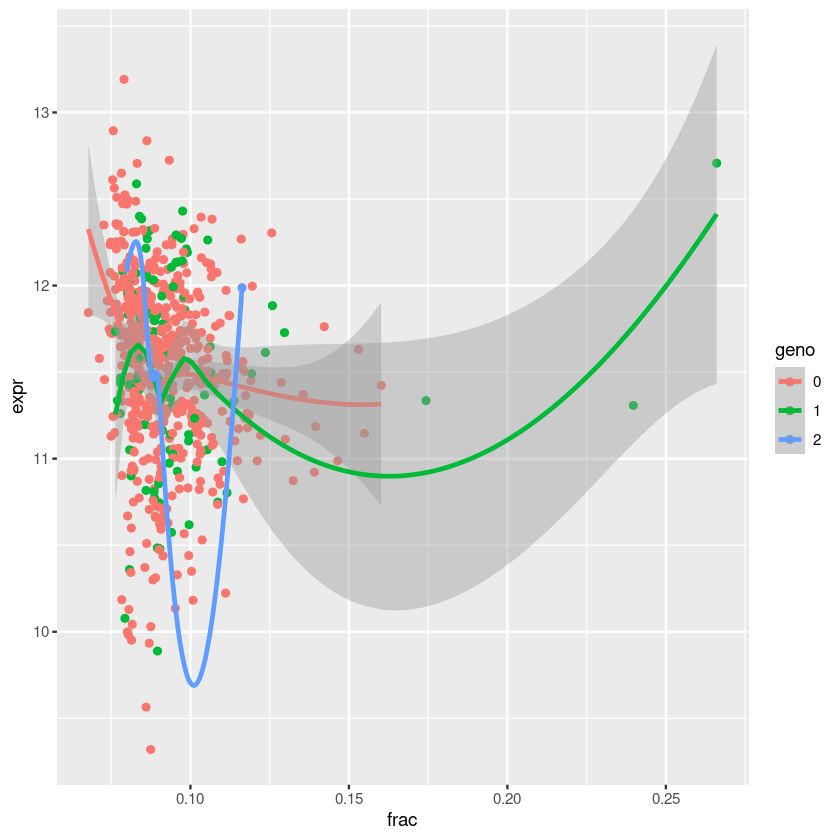

In [10]:
p <- ggplot(df, aes(x = frac, y = expr)) +
    geom_point(aes(color = geno)) +
    geom_smooth(aes(color = geno)) 
p

**ENSG00000151150_rs116833268, In**

In [7]:
df <- t(bulk.decon["ENSG00000151150",])
df <- as.data.frame(cbind(df, frac)) %>% select(ENSG00000151150, In)
qtl <- dosage %>% filter(V1 == "rs116833268")
qtl <- qtl %>% select(-1)
df <- cbind(df, as.data.frame(t(qtl)))
colnames(df) <- c("expr", "frac", "geno")
df$geno <- as.factor(df$geno)

`geom_smooth()` using formula 'y ~ x'



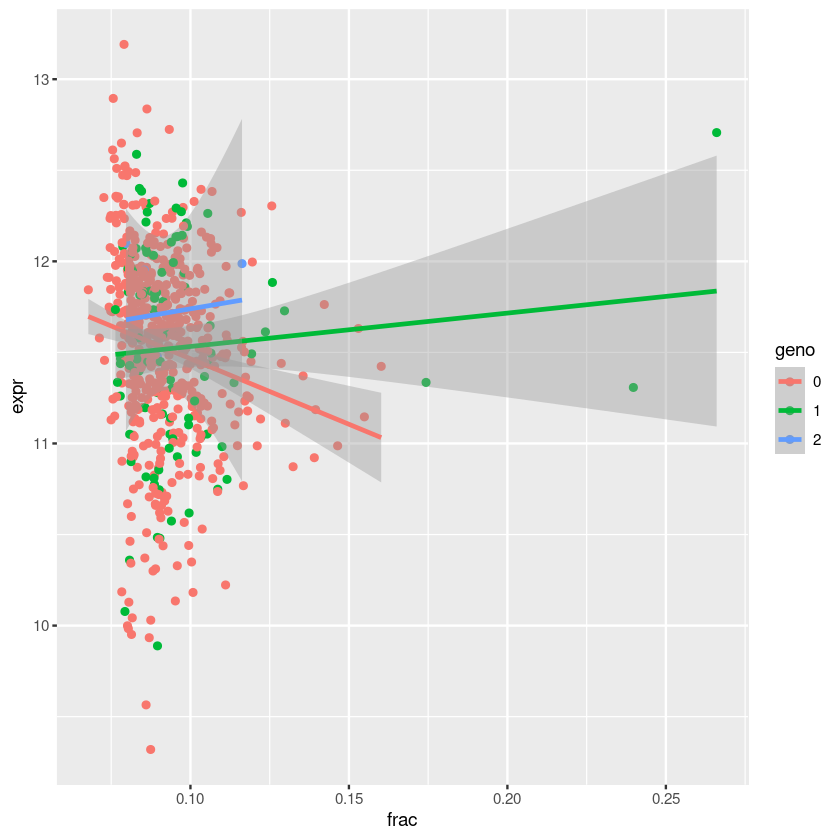

In [12]:
p <- ggplot(df, aes(x = frac, y = expr)) +
    geom_point(aes(color = geno)) +
    geom_smooth(aes(color = geno), method = "lm") 
p